# Vacinação para a Covid-19 no Rio Grande do Norte

## Essa primeira seção contém somente uma rápida exploração dos dados baixados no site do ministério da saúde



Análise dos dados para a vacinação da Covid-19 no estado do Rio Grande do Norte. O intuito de analisar este dataset foi procurar responder as seguintes perguntas:

Quantas pessoas já estão vacinadas com pelo menos 1 dose (D1)?

Quantas pessoas já estão completamente vacinadas (D1+D2)?

O gêneros (homem/mulher) que foram mais cobertos com a vacinação?

A idade média das pesoas que está completamente imunizada?

Qual é o perfil dos vacinados quanto a raça?

Qual foi a vacina mais aplicada por fabricante?



Link do arquivo csv: data do acesso: 12/08/2021 [Opendatasus](https://opendatasus.saude.gov.br/dataset/covid-19-vacinacao/resource/ef3bd0b8-b605-474b-9ae5-c97390c197a8)

In [1]:
#!pip install plotly --upgrade

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

## Explorando os dados superficialmente

In [2]:
# Carregando os dados do arquivo csv sobre a vacinação no Rio Grande do Norte
data_vac = pd.read_csv('dados_vacina_RN_dirty.csv', sep=';')

In [3]:
# Vamos ver quantas linhas e colunas tem o nosso dataset

data_vac.shape

(2368967, 34)

In [4]:
# As 5 primeiras linhas do arquivo
data_vac.head()

,document_id,paciente_id,paciente_idade,paciente_datanascimento,paciente_enumsexobiologico,paciente_racacor_codigo,paciente_racacor_valor,paciente_endereco_coibgemunicipio,paciente_endereco_copais,paciente_endereco_nmmunicipio,...,vacina_lote,vacina_fabricante_nome,vacina_fabricante_referencia,vacina_dataaplicacao,vacina_descricao_dose,vacina_codigo,vacina_nome,sistema_origem,data_importacao_rnds,id_sistema_origem
0,0d6656be-9daa-47cb-9946-320890f0e773-i0b0,510e2abbdcb4d9964921d82e01175964e89429dafaa8d3...,54.0,1966-12-15,M,3.0,PARDA,240260.0,10.0,CEARA-MIRIM,...,214VCD045Z,FUNDACAO OSWALDO CRUZ,NaN,2021-05-20,1ª Dose,85,Vacina Covid-19 - Covishield,RN + Vacina,2021-05-24T17:34:07.000Z,17862
1,e18c5f6b-102d-4674-861b-dae938c2f459-i0b0,20a41d2bc30e8f1f3b42c5922b9df13b0d09c8aac528a0...,48.0,1973-02-16,F,1.0,BRANCA,240325.0,10.0,PARNAMIRIM,...,210214,FUNDACAO BUTANTAN,NaN,2021-05-14,2ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,RN + Vacina,2021-05-21T22:46:07.000Z,17862
2,e151287c-d239-417e-a700-9c608a53faf0-i0b0,0e1b5be3ea132c6acc01d7777aa00908bbba4d6c45007b...,40.0,1981-02-16,F,3.0,PARDA,240260.0,10.0,CEARA-MIRIM,...,FA9090,PFIZER MANUFACTURING BELGIUM NV - BELGICA,NaN,2021-07-14,1ª Dose,87,Vacina covid-19 - BNT162b2 - BioNTech/Fosun Ph...,RN + Vacina,2021-07-15T22:39:55.000Z,17862
3,935404e5-b3f1-44cc-93df-f1a0642d8922-i0b0,26708054d153e3a564850ebfad649a35bbf9bd66f75ba2...,39.0,1982-01-09,F,3.0,PARDA,240800.0,10.0,MOSSORO,...,202009011,FUNDACAO BUTANTAN,NaN,2021-02-17,2ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,RN + Vacina,2021-02-22T14:37:16.000Z,17862
4,2c6088f8-c7ba-4abb-8649-97891e61a6b2-i0b0,fd89119b2a017ecbfac1500038f48b313518435f3e296c...,45.0,1975-09-02,F,4.0,AMARELA,240810.0,10.0,NATAL,...,FD7221,PFIZER MANUFACTURING BELGIUM NV - BELGICA,NaN,2021-08-03,1ª Dose,87,Vacina covid-19 - BNT162b2 - BioNTech/Fosun Ph...,RN + Vacina,2021-08-05T17:26:04.000Z,17862


Uma primeira dos dados acima mostra que:

1 - categorias entre 101 e 111 e de comorbidades

2 - categorias entre 201 e 205 foram a faixa etaria de pessoas de 80 anos ou mais

3-  301 e de Pessoas de 60 nos ou mais Institucionalizadas

4 - 401 ate 403 e forcas armadas

5 - 501 ate 207 sao os agentes de seguranca (bombeiros, guardas civil/militar, policia rodovi. )

6 - 601 sao quilombolas

7 - 701 sao povos indigenas

8 - 801 e 802 ensino basico e ensino superior

9 - Trabalhadores da saude 901 ate 929
    901: Auxiliar de Veterinário 
    902: Biólogo
    903: Biomédico  
    904: Cozinheiros e auxiliares
    905: cuidados de idoso
    906: doula/parteira
    907: enfermeiros
    908: Farmacêutico
    909: Fisioterapeutas
    910: Fonoaudiólogo
    911: Funcionário do Sistema Funerário c/ cadáveres
    912: Médico
    913: Médico Veterinário
    914: Motorista de Ambulância
    915: Nutricionista
    916: Odontologista
    917: Pessoal da Limpeza
    918: Profissionais de Educação Física
    
10 - 930 931 e 932 nao estao especificados

11 - 1001 ate 1006 sao trabalhadores de transportes
     
12 1101 e 1102 sao PCD

13 - 1201   Pessoas em Situação de Rua

14 - 1301     Trabalhadores Portuários

15 - 1401 funcionarios do sistema prisional

16 - 1501 populacao carceraria

Sao apenas algumas das categorias identificadas

In [5]:
# Exibindo as cinco ultimas linhas do arquivo
data_vac.tail(5)

,document_id,paciente_id,paciente_idade,paciente_datanascimento,paciente_enumsexobiologico,paciente_racacor_codigo,paciente_racacor_valor,paciente_endereco_coibgemunicipio,paciente_endereco_copais,paciente_endereco_nmmunicipio,...,vacina_lote,vacina_fabricante_nome,vacina_fabricante_referencia,vacina_dataaplicacao,vacina_descricao_dose,vacina_codigo,vacina_nome,sistema_origem,data_importacao_rnds,id_sistema_origem
2368962,564a35fc-0023-4980-b8f1-5af37dc7568b-i0b0,ff23eee73799a593a6ae93527af1f881c8d714e2262da7...,24.0,1997-02-12,F,1.0,BRANCA,240020.0,10.0,ACU,...,214VCD107Z,FUNDACAO OSWALDO CRUZ,NaN,2021-07-11,1ª Dose,85,Vacina Covid-19 - Covishield,RN + Vacina,2021-07-13T21:52:26.000Z,17862
2368963,732ece03-d505-4d4f-b9e5-eff3ab83e513-i0b0,895120bfbb64dd5f000b329d66afb41e2fa444e6324fe5...,60.0,1960-11-26,F,1.0,BRANCA,240325.0,10.0,PARNAMIRIM,...,213VCD011W,FUNDACAO OSWALDO CRUZ,NaN,2021-04-26,1ª Dose,85,Vacina Covid-19 - Covishield,RN + Vacina,2021-04-28T04:07:49.000Z,17862
2368964,a829d253-073a-4d7c-9749-ac0001de79d6-i0b0,82ad0da418fc745779d5d1d7ece9285a9e1b34bac96dbd...,63.0,1958-04-13,F,3.0,PARDA,240810.0,10.0,NATAL,...,213VCD004W,FUNDACAO OSWALDO CRUZ,NaN,2021-04-13,1ª Dose,85,Vacina Covid-19 - Covishield,RN + Vacina,2021-04-13T15:57:12.000Z,17862
2368965,bbeeef81-ba90-4a26-9c30-6d54444dd9ba-i0b0,88e77725fc2da21e210326bcc4ecdeb115471f5c070632...,38.0,1982-08-21,F,1.0,BRANCA,240810.0,10.0,NATAL,...,FA7478,PFIZER MANUFACTURING BELGIUM NV - BELGIVA,NaN,2021-06-08,1ª Dose,87,Vacina covid-19 - BNT162b2 - BioNTech/Fosun Ph...,RN + Vacina,2021-06-08T21:57:36.000Z,17862
2368966,b2575dcf-663e-4755-9661-6c6d459ce2e7-i0b0,347a85126e659bbcb8cc29b810c13796eb90c36dc1c204...,30.0,1990-10-23,M,4.0,AMARELA,240830.0,10.0,NOVA CRUZ,...,202010028,FUNDACAO BUTANTAN,NaN,2021-01-22,1ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,RN + Vacina,2021-03-13T10:42:52.000Z,17862


In [6]:
# Quantas pessoas acima de 60 anos foram vacinadas? 881000 

data_vac[data_vac['paciente_idade'] >= 60]

,document_id,paciente_id,paciente_idade,paciente_datanascimento,paciente_enumsexobiologico,paciente_racacor_codigo,paciente_racacor_valor,paciente_endereco_coibgemunicipio,paciente_endereco_copais,paciente_endereco_nmmunicipio,...,vacina_lote,vacina_fabricante_nome,vacina_fabricante_referencia,vacina_dataaplicacao,vacina_descricao_dose,vacina_codigo,vacina_nome,sistema_origem,data_importacao_rnds,id_sistema_origem
5,81725992-b9a6-4e04-ad60-20e195944f85-i0b0,10a0137088621d9d332ab5b157a1b5a468f8c54f0c5d46...,63.0,1957-09-26,M,3.0,PARDA,240810.0,10.0,NATAL,...,214VCD107Z,FUNDACAO OSWALDO CRUZ,NaN,2021-07-05,2ª Dose,85,Vacina Covid-19 - Covishield,RN + Vacina,2021-07-14T21:40:00.000Z,17862
7,90d80df8-9982-40ff-b925-6deac3e78abe-i0b0,64003d0115dbd9215e5660dea5c9424f9de75fdb435519...,65.0,1955-12-10,F,1.0,BRANCA,240070.0,10.0,ALTO DO RODRIGUES,...,215VCD012VA,FUNDACAO OSWALDO CRUZ,NaN,2021-07-21,2ª Dose,85,Vacina Covid-19 - Covishield,RN + Vacina,2021-07-22T06:59:09.000Z,17862
10,4a8e746f-94e9-429e-b969-4bd60e5823ae-i0b0,facbc88b2dcb6ff7713f0e367834ae7392073a5fe80858...,60.0,1960-12-30,M,4.0,AMARELA,240800.0,10.0,MOSSORO,...,214VCD107Z,FUNDACAO OSWALDO CRUZ,NaN,2021-04-12,1ª Dose,85,Vacina Covid-19 - Covishield,RN + Vacina,2021-07-12T22:28:53.000Z,17862
13,aed8752c-99e7-4f8e-95cc-154c67ccf157-i0b0,e4dbb106bf2dc3781c108e62cd6c0f4e7a5fc90f1522d0...,90.0,1931-02-15,F,99.0,SEM INFORMACAO,240810.0,10.0,NATAL,...,202009011,FUNDACAO BUTANTAN,NaN,2021-03-04,2ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,RN + Vacina,2021-03-13T10:10:43.000Z,17862
15,e14311e6-4c0d-4f13-b89a-4a5c51d41dd1-i0b0,27eaad0985ce85d49adcb68d76f9892a422393d39ddeb5...,66.0,1954-08-24,F,99.0,SEM INFORMACAO,240810.0,10.0,NATAL,...,210214,FUNDACAO BUTANTAN,NaN,2021-05-15,2ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,RN + Vacina,2021-05-26T15:58:04.000Z,17862
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2368951,2e13f4d9-8722-4f1c-98bb-bebf7cfb17f9-i0b0,0eccdde6fabeb0d1c22b47c74286afd7bd0de4219c4a4a...,73.0,1947-11-28,M,1.0,BRANCA,240810.0,10.0,NATAL,...,210042A,FUNDACAO BUTANTAN,NaN,2021-03-24,1ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,RN + Vacina,2021-03-29T22:18:34.000Z,17862
2368952,4868c8fd-ce2e-4f08-8531-1a0dc4a867f7-i0b0,06f6a4b4883d2c9f4885c254486c11dd30f66d3f7b2d74...,84.0,1936-06-23,F,3.0,PARDA,240800.0,10.0,MOSSORO,...,210059,FUNDACAO BUTANTAN,NaN,2021-03-19,1ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,RN + Vacina,2021-04-02T21:06:34.000Z,17862
2368955,0a1515ad-6051-4aac-bd3b-fe0f26e532c3-i0b0,70a43ba6db62a6f79c99f17e5586bb7a6569ba7171166d...,79.0,1941-05-01,F,99.0,SEM INFORMACAO,241400.0,10.0,TANGARA,...,4120Z001,FUNDACAO OSWALDO CRUZ,NaN,2021-03-09,1ª Dose,85,Vacina Covid-19 - Covishield,RN + Vacina,2021-03-13T09:35:08.000Z,17862
2368963,732ece03-d505-4d4f-b9e5-eff3ab83e513-i0b0,895120bfbb64dd5f000b329d66afb41e2fa444e6324fe5...,60.0,1960-11-26,F,1.0,BRANCA,240325.0,10.0,PARNAMIRIM,...,213VCD011W,FUNDACAO OSWALDO CRUZ,NaN,2021-04-26,1ª Dose,85,Vacina Covid-19 - Covishield,RN + Vacina,2021-04-28T04:07:49.000Z,17862


In [7]:
# Quantas pessoas com 40 anos ou menos foram vacinadas? 
data_vac[data_vac['paciente_idade'] <= 40]

,document_id,paciente_id,paciente_idade,paciente_datanascimento,paciente_enumsexobiologico,paciente_racacor_codigo,paciente_racacor_valor,paciente_endereco_coibgemunicipio,paciente_endereco_copais,paciente_endereco_nmmunicipio,...,vacina_lote,vacina_fabricante_nome,vacina_fabricante_referencia,vacina_dataaplicacao,vacina_descricao_dose,vacina_codigo,vacina_nome,sistema_origem,data_importacao_rnds,id_sistema_origem
2,e151287c-d239-417e-a700-9c608a53faf0-i0b0,0e1b5be3ea132c6acc01d7777aa00908bbba4d6c45007b...,40.0,1981-02-16,F,3.0,PARDA,240260.0,10.0,CEARA-MIRIM,...,FA9090,PFIZER MANUFACTURING BELGIUM NV - BELGICA,NaN,2021-07-14,1ª Dose,87,Vacina covid-19 - BNT162b2 - BioNTech/Fosun Ph...,RN + Vacina,2021-07-15T22:39:55.000Z,17862
3,935404e5-b3f1-44cc-93df-f1a0642d8922-i0b0,26708054d153e3a564850ebfad649a35bbf9bd66f75ba2...,39.0,1982-01-09,F,3.0,PARDA,240800.0,10.0,MOSSORO,...,202009011,FUNDACAO BUTANTAN,NaN,2021-02-17,2ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,RN + Vacina,2021-02-22T14:37:16.000Z,17862
6,095093ad-b7d8-414c-925e-e09b2153b6e7-i0b0,698ee868a24f6a1300d7aadb389548cc9db1029ec4b36f...,37.0,1983-07-27,F,1.0,BRANCA,240620.0,10.0,LAGOA D'ANTA,...,215VCD012VA,FUNDACAO OSWALDO CRUZ,NaN,2021-07-26,1ª Dose,85,Vacina Covid-19 - Covishield,RN + Vacina,2021-07-29T22:39:39.000Z,17862
8,81ea2192-13c5-4254-9f5c-944ec155dbac-i0b0,6c9df751d8ba3fcb0b8979a945b0ceb51e3197e364bd77...,39.0,1981-05-14,M,1.0,BRANCA,250750.0,10.0,JOAO PESSOA,...,202010028,FUNDACAO BUTANTAN,NaN,2021-02-01,1ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,RN + Vacina,2021-02-07T18:35:05.000Z,17862
9,e377981e-2f24-40f5-a5d2-bc844d24097d-i0b0,d2ff2234d2f29aadc8b2c576d810660dabfd59b4fe75c3...,33.0,1987-10-09,F,3.0,PARDA,240580.0,10.0,JOAO CAMARA,...,210133,FUNDACAO BUTANTAN,NaN,2021-05-06,2ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,RN + Vacina,2021-05-16T01:51:10.000Z,17862
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2368947,1f696054-7169-42ea-bdd8-edbb2a3f87d8-i0b0,514af294b8b62b1f771bf5e4b3882f2ddeb48d9989de1e...,38.0,1983-03-03,M,4.0,AMARELA,240750.0,10.0,MAXARANGUAPE,...,FC2495,PFIZER MANUFACTURING BELGIUM NV - BELGIVA,NaN,2021-07-09,1ª Dose,87,Vacina covid-19 - BNT162b2 - BioNTech/Fosun Ph...,RN + Vacina,2021-07-14T17:07:29.000Z,17862
2368958,b7285d64-c591-4a6f-84f8-6e4e0beef939-i0b0,885a01d835b2250d2954f111b6d2beebfe9a3bb256576b...,32.0,1989-02-21,M,99.0,SEM INFORMACAO,240325.0,10.0,PARNAMIRIM,...,FD7209,PFIZER MANUFACTURING BELGIUM NV - BELGICA,NaN,2021-08-07,1ª Dose,87,Vacina covid-19 - BNT162b2 - BioNTech/Fosun Ph...,RN + Vacina,2021-08-08T05:32:57.000Z,17862
2368962,564a35fc-0023-4980-b8f1-5af37dc7568b-i0b0,ff23eee73799a593a6ae93527af1f881c8d714e2262da7...,24.0,1997-02-12,F,1.0,BRANCA,240020.0,10.0,ACU,...,214VCD107Z,FUNDACAO OSWALDO CRUZ,NaN,2021-07-11,1ª Dose,85,Vacina Covid-19 - Covishield,RN + Vacina,2021-07-13T21:52:26.000Z,17862
2368965,bbeeef81-ba90-4a26-9c30-6d54444dd9ba-i0b0,88e77725fc2da21e210326bcc4ecdeb115471f5c070632...,38.0,1982-08-21,F,1.0,BRANCA,240810.0,10.0,NATAL,...,FA7478,PFIZER MANUFACTURING BELGIUM NV - BELGIVA,NaN,2021-06-08,1ª Dose,87,Vacina covid-19 - BNT162b2 - BioNTech/Fosun Ph...,RN + Vacina,2021-06-08T21:57:36.000Z,17862


678560 pessoas com 40 anos ou menos foram vacinadas.

In [8]:
#quantas pessoas desse total não tem endereço no RN? 
data_vac[data_vac['paciente_endereco_uf'] != 'RN' ]

,document_id,paciente_id,paciente_idade,paciente_datanascimento,paciente_enumsexobiologico,paciente_racacor_codigo,paciente_racacor_valor,paciente_endereco_coibgemunicipio,paciente_endereco_copais,paciente_endereco_nmmunicipio,...,vacina_lote,vacina_fabricante_nome,vacina_fabricante_referencia,vacina_dataaplicacao,vacina_descricao_dose,vacina_codigo,vacina_nome,sistema_origem,data_importacao_rnds,id_sistema_origem
8,81ea2192-13c5-4254-9f5c-944ec155dbac-i0b0,6c9df751d8ba3fcb0b8979a945b0ceb51e3197e364bd77...,39.0,1981-05-14,M,1.0,BRANCA,250750.0,10.0,JOAO PESSOA,...,202010028,FUNDACAO BUTANTAN,NaN,2021-02-01,1ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,RN + Vacina,2021-02-07T18:35:05.000Z,17862
50,766d69ae-311f-4c49-9b79-92817c7185ae-i0b0,092dbbfc5bf6d5556ae2d5e22503d52dd45333f40334f9...,49.0,1971-06-25,M,99.0,SEM INFORMACAO,230440.0,10.0,FORTALEZA,...,FC2495,PFIZER MANUFACTURING BELGIUM NV - BELGIVA,NaN,2021-06-15,1ª Dose,87,Vacina covid-19 - BNT162b2 - BioNTech/Fosun Ph...,RN + Vacina,2021-06-17T00:47:19.000Z,17862
96,02a9222a-1aa0-4840-ae68-6285a223557c-i0b0,a458f295226321d7e1a0e771677d1d386c461a79c1f829...,31.0,1990-01-02,F,4.0,AMARELA,231123.0,10.0,POTIRETAMA,...,202010028,FUNDACAO BUTANTAN,NaN,2021-01-26,1ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,RN + Vacina,2021-02-09T02:32:52.000Z,17862
128,5b58107f-4a07-47f2-a50a-d6d358602ba0-i0b0,41a2472466d5ed670e4941ea12a4aabd242ff917b58983...,30.0,1990-09-03,M,1.0,BRANCA,250510.0,10.0,CUITE,...,210198,ASTRAZENECA AB,NaN,2021-07-28,1ª Dose,85,Vacina Covid-19 - Covishield,RN + Vacina,2021-07-28T18:08:43.000Z,17862
146,80e78e78-ba1d-4282-93cb-1bc26c962afe-i0b0,c82a05a68625adc981a943afdd39094e8172dce2fdcf91...,32.0,1988-08-13,F,99.0,SEM INFORMACAO,270430.0,10.0,MACEIO,...,FC2495,PFIZER MANUFACTURING BELGIUM NV - BELGIVA,NaN,2021-06-17,1ª Dose,87,Vacina covid-19 - BNT162b2 - BioNTech/Fosun Ph...,RN + Vacina,2021-06-17T17:46:15.000Z,17862
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2368833,9ea88f96-958b-4f8f-9c56-0baaa6d6cab7-i0b0,9027332b371eb4174e49c5e443ca15a5f616b3605c3b82...,34.0,1987-07-11,F,4.0,AMARELA,260345.0,10.0,CAMARAGIBE,...,FD7219,PFIZER MANUFACTURING BELGIUM NV - BELGICA,NaN,2021-08-03,1ª Dose,87,Vacina covid-19 - BNT162b2 - BioNTech/Fosun Ph...,RN + Vacina,2021-08-03T20:47:01.000Z,17862
2368847,e3954e0a-aff5-4336-81a6-08c311fa791b-i0b0,9ab79970d634336c99c21bc072cd16a504bd9ddbb1ac2c...,52.0,1968-06-14,M,1.0,BRANCA,150034.0,10.0,AGUA AZUL DO NORTE,...,210221A,FUNDACAO BUTANTAN,NaN,2021-05-31,1ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,RN + Vacina,2021-05-31T15:14:03.000Z,17862
2368879,a2657adc-d8a4-4d80-8c01-d039953fad77-i0b0,00d12326388c24cd61bd869b11d26a6e7c2dcad34ce8b2...,36.0,1984-12-19,F,1.0,BRANCA,330455.0,10.0,RIO DE JANEIRO,...,215VCD153W,FUNDACAO OSWALDO CRUZ,NaN,2021-07-19,1ª Dose,85,Vacina Covid-19 - Covishield,RN + Vacina,2021-07-22T19:51:51.000Z,17862
2368938,6852d77d-61e2-464a-951a-e62bb560dd8b-i0b0,e45d99eda4f773f754a08e30d9b868c2c29503e5ccb970...,47.0,1973-06-29,M,4.0,AMARELA,291480.0,10.0,ITABUNA,...,214VCD056W,FUNDACAO OSWALDO CRUZ,NaN,2021-06-11,1ª Dose,85,Vacina Covid-19 - Covishield,RN + Vacina,2021-06-17T02:44:25.000Z,17862


88407 cujo endereço não é do RN, se vacinaram aqui. Porém, não temos como saber se de fato elas residem 
no RN, ou estavam só de passagem. Mas vamos assumir que elas moram aqui.

# Visualizando os dados

### Analisando os dados quanto ao sexo.

In [9]:
data_vac[data_vac['paciente_enumsexobiologico'] == 'I' ]

,document_id,paciente_id,paciente_idade,paciente_datanascimento,paciente_enumsexobiologico,paciente_racacor_codigo,paciente_racacor_valor,paciente_endereco_coibgemunicipio,paciente_endereco_copais,paciente_endereco_nmmunicipio,...,vacina_lote,vacina_fabricante_nome,vacina_fabricante_referencia,vacina_dataaplicacao,vacina_descricao_dose,vacina_codigo,vacina_nome,sistema_origem,data_importacao_rnds,id_sistema_origem
240888,d5187c88-af48-4e55-a335-dfea2561722d-i0b0,261be7af0b14ff44cc2453d8b826956aa828bda84156d3...,51.0,1969-09-01,I,2.0,PRETA,241150.0,10.0,SANTO ANTONIO,...,215VCD012VA,FUNDACAO OSWALDO CRUZ,NaN,2021-07-21,1ª Dose,85,Vacina Covid-19 - Covishield,RN + Vacina,2021-07-24T12:42:47.000Z,17862
613178,6124d470-b726-4906-81d5-6ebb594065af-i0b0,ef552f6c4c80aaddb676bd806f0df020a21e17fcc34133...,72.0,1949-01-10,I,1.0,BRANCA,240810.0,10.0,NATAL,...,210081,FUNDACAO BUTANTAN,NaN,2021-03-26,1ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,RN + Vacina,2021-03-26T17:08:17.000Z,17862
1609945,b6d17ea5-53e5-4a18-b48f-40f7e67b36d5-i0b0,23ceccd9a0bd4de8f02e75c4818890a2914a562c9940cf...,79.0,1941-11-17,I,99.0,SEM INFORMACAO,240325.0,10.0,PARNAMIRIM,...,210013,FUNDACAO BUTANTAN,NaN,2021-03-15,1ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,RN + Vacina,2021-03-17T22:10:13.000Z,17862
1709085,eb72fd81-aa3f-4c5b-9244-3561843fc7f4-i0b0,e53fce984f0471359a0e082a84428b6f0e75306af031df...,53.0,1968-02-06,I,1.0,BRANCA,240220.0,10.0,CANGUARETAMA,...,213VCD032W,FUNDACAO OSWALDO CRUZ,NaN,2021-06-16,1ª Dose,85,Vacina Covid-19 - Covishield,RN + Vacina,2021-06-24T04:20:38.000Z,17862
1807752,acba3f1d-0638-4f83-b315-987c3757f781-i0b0,ef552f6c4c80aaddb676bd806f0df020a21e17fcc34133...,72.0,1949-01-10,I,1.0,BRANCA,240810.0,10.0,NATAL,...,210112,FUNDACAO BUTANTAN,NaN,2021-04-23,2ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,RN + Vacina,2021-04-23T15:58:52.000Z,17862
1890988,2adeaeb4-545c-4ab0-aa69-6c83ced6dc80-i0b0,23ceccd9a0bd4de8f02e75c4818890a2914a562c9940cf...,79.0,1941-11-17,I,99.0,SEM INFORMACAO,240325.0,10.0,PARNAMIRIM,...,210112,FUNDACAO BUTANTAN,NaN,2021-04-13,2ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,RN + Vacina,2021-04-13T15:28:54.000Z,17862


In [10]:
data_vac[data_vac['paciente_enumsexobiologico'] == 'F' ]

,document_id,paciente_id,paciente_idade,paciente_datanascimento,paciente_enumsexobiologico,paciente_racacor_codigo,paciente_racacor_valor,paciente_endereco_coibgemunicipio,paciente_endereco_copais,paciente_endereco_nmmunicipio,...,vacina_lote,vacina_fabricante_nome,vacina_fabricante_referencia,vacina_dataaplicacao,vacina_descricao_dose,vacina_codigo,vacina_nome,sistema_origem,data_importacao_rnds,id_sistema_origem
1,e18c5f6b-102d-4674-861b-dae938c2f459-i0b0,20a41d2bc30e8f1f3b42c5922b9df13b0d09c8aac528a0...,48.0,1973-02-16,F,1.0,BRANCA,240325.0,10.0,PARNAMIRIM,...,210214,FUNDACAO BUTANTAN,NaN,2021-05-14,2ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,RN + Vacina,2021-05-21T22:46:07.000Z,17862
2,e151287c-d239-417e-a700-9c608a53faf0-i0b0,0e1b5be3ea132c6acc01d7777aa00908bbba4d6c45007b...,40.0,1981-02-16,F,3.0,PARDA,240260.0,10.0,CEARA-MIRIM,...,FA9090,PFIZER MANUFACTURING BELGIUM NV - BELGICA,NaN,2021-07-14,1ª Dose,87,Vacina covid-19 - BNT162b2 - BioNTech/Fosun Ph...,RN + Vacina,2021-07-15T22:39:55.000Z,17862
3,935404e5-b3f1-44cc-93df-f1a0642d8922-i0b0,26708054d153e3a564850ebfad649a35bbf9bd66f75ba2...,39.0,1982-01-09,F,3.0,PARDA,240800.0,10.0,MOSSORO,...,202009011,FUNDACAO BUTANTAN,NaN,2021-02-17,2ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,RN + Vacina,2021-02-22T14:37:16.000Z,17862
4,2c6088f8-c7ba-4abb-8649-97891e61a6b2-i0b0,fd89119b2a017ecbfac1500038f48b313518435f3e296c...,45.0,1975-09-02,F,4.0,AMARELA,240810.0,10.0,NATAL,...,FD7221,PFIZER MANUFACTURING BELGIUM NV - BELGICA,NaN,2021-08-03,1ª Dose,87,Vacina covid-19 - BNT162b2 - BioNTech/Fosun Ph...,RN + Vacina,2021-08-05T17:26:04.000Z,17862
6,095093ad-b7d8-414c-925e-e09b2153b6e7-i0b0,698ee868a24f6a1300d7aadb389548cc9db1029ec4b36f...,37.0,1983-07-27,F,1.0,BRANCA,240620.0,10.0,LAGOA D'ANTA,...,215VCD012VA,FUNDACAO OSWALDO CRUZ,NaN,2021-07-26,1ª Dose,85,Vacina Covid-19 - Covishield,RN + Vacina,2021-07-29T22:39:39.000Z,17862
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2368961,752b8121-bc94-4acc-8c0e-1e2c74e692bc-i0b0,3977e7b4e27764b2189528cbd4d5a3b727d0184b970d7c...,43.0,1978-02-18,F,1.0,BRANCA,240740.0,10.0,MARTINS,...,216VCD185W,FUNDACAO OSWALDO CRUZ,NaN,2021-07-23,1ª Dose,85,Vacina Covid-19 - Covishield,RN + Vacina,2021-07-23T17:12:22.000Z,17862
2368962,564a35fc-0023-4980-b8f1-5af37dc7568b-i0b0,ff23eee73799a593a6ae93527af1f881c8d714e2262da7...,24.0,1997-02-12,F,1.0,BRANCA,240020.0,10.0,ACU,...,214VCD107Z,FUNDACAO OSWALDO CRUZ,NaN,2021-07-11,1ª Dose,85,Vacina Covid-19 - Covishield,RN + Vacina,2021-07-13T21:52:26.000Z,17862
2368963,732ece03-d505-4d4f-b9e5-eff3ab83e513-i0b0,895120bfbb64dd5f000b329d66afb41e2fa444e6324fe5...,60.0,1960-11-26,F,1.0,BRANCA,240325.0,10.0,PARNAMIRIM,...,213VCD011W,FUNDACAO OSWALDO CRUZ,NaN,2021-04-26,1ª Dose,85,Vacina Covid-19 - Covishield,RN + Vacina,2021-04-28T04:07:49.000Z,17862
2368964,a829d253-073a-4d7c-9749-ac0001de79d6-i0b0,82ad0da418fc745779d5d1d7ece9285a9e1b34bac96dbd...,63.0,1958-04-13,F,3.0,PARDA,240810.0,10.0,NATAL,...,213VCD004W,FUNDACAO OSWALDO CRUZ,NaN,2021-04-13,1ª Dose,85,Vacina Covid-19 - Covishield,RN + Vacina,2021-04-13T15:57:12.000Z,17862


In [11]:
data_vac[data_vac['paciente_enumsexobiologico'] == 'M' ]

,document_id,paciente_id,paciente_idade,paciente_datanascimento,paciente_enumsexobiologico,paciente_racacor_codigo,paciente_racacor_valor,paciente_endereco_coibgemunicipio,paciente_endereco_copais,paciente_endereco_nmmunicipio,...,vacina_lote,vacina_fabricante_nome,vacina_fabricante_referencia,vacina_dataaplicacao,vacina_descricao_dose,vacina_codigo,vacina_nome,sistema_origem,data_importacao_rnds,id_sistema_origem
0,0d6656be-9daa-47cb-9946-320890f0e773-i0b0,510e2abbdcb4d9964921d82e01175964e89429dafaa8d3...,54.0,1966-12-15,M,3.0,PARDA,240260.0,10.0,CEARA-MIRIM,...,214VCD045Z,FUNDACAO OSWALDO CRUZ,NaN,2021-05-20,1ª Dose,85,Vacina Covid-19 - Covishield,RN + Vacina,2021-05-24T17:34:07.000Z,17862
5,81725992-b9a6-4e04-ad60-20e195944f85-i0b0,10a0137088621d9d332ab5b157a1b5a468f8c54f0c5d46...,63.0,1957-09-26,M,3.0,PARDA,240810.0,10.0,NATAL,...,214VCD107Z,FUNDACAO OSWALDO CRUZ,NaN,2021-07-05,2ª Dose,85,Vacina Covid-19 - Covishield,RN + Vacina,2021-07-14T21:40:00.000Z,17862
8,81ea2192-13c5-4254-9f5c-944ec155dbac-i0b0,6c9df751d8ba3fcb0b8979a945b0ceb51e3197e364bd77...,39.0,1981-05-14,M,1.0,BRANCA,250750.0,10.0,JOAO PESSOA,...,202010028,FUNDACAO BUTANTAN,NaN,2021-02-01,1ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,RN + Vacina,2021-02-07T18:35:05.000Z,17862
10,4a8e746f-94e9-429e-b969-4bd60e5823ae-i0b0,facbc88b2dcb6ff7713f0e367834ae7392073a5fe80858...,60.0,1960-12-30,M,4.0,AMARELA,240800.0,10.0,MOSSORO,...,214VCD107Z,FUNDACAO OSWALDO CRUZ,NaN,2021-04-12,1ª Dose,85,Vacina Covid-19 - Covishield,RN + Vacina,2021-07-12T22:28:53.000Z,17862
12,2fa03d26-0a29-4469-b3ed-d2b287bf0064-i0b0,6000a0bdb0589cc40085b7be5093f418ef43552c1f44cc...,41.0,1980-06-25,M,99.0,SEM INFORMACAO,240325.0,10.0,PARNAMIRIM,...,215VCD012VA,FUNDACAO OSWALDO CRUZ,NaN,2021-07-14,1ª Dose,85,Vacina Covid-19 - Covishield,RN + Vacina,2021-07-14T15:12:51.000Z,17862
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2368951,2e13f4d9-8722-4f1c-98bb-bebf7cfb17f9-i0b0,0eccdde6fabeb0d1c22b47c74286afd7bd0de4219c4a4a...,73.0,1947-11-28,M,1.0,BRANCA,240810.0,10.0,NATAL,...,210042A,FUNDACAO BUTANTAN,NaN,2021-03-24,1ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,RN + Vacina,2021-03-29T22:18:34.000Z,17862
2368953,ce9b1dbc-1c06-4a8f-bd20-f5728b9a9593-i0b0,86c59b657d976236be48f5a23a5b3b6f8442f614c11e4d...,52.0,1969-04-02,M,4.0,AMARELA,240800.0,10.0,MOSSORO,...,214VCD056W,FUNDACAO OSWALDO CRUZ,NaN,2021-06-14,1ª Dose,85,Vacina Covid-19 - Covishield,RN + Vacina,2021-06-14T22:26:00.000Z,17862
2368954,7aa42bb8-5dfc-40b5-ad20-8dc963b5342f-i0b0,9b2609a69103fbd73180ccc07be85c3a6a4303101e0946...,49.0,1972-03-06,M,3.0,PARDA,240810.0,10.0,NATAL,...,FD7221,PFIZER MANUFACTURING BELGIUM NV - BELGICA,NaN,2021-08-04,1ª Dose,87,Vacina covid-19 - BNT162b2 - BioNTech/Fosun Ph...,RN + Vacina,2021-08-04T16:30:38.000Z,17862
2368958,b7285d64-c591-4a6f-84f8-6e4e0beef939-i0b0,885a01d835b2250d2954f111b6d2beebfe9a3bb256576b...,32.0,1989-02-21,M,99.0,SEM INFORMACAO,240325.0,10.0,PARNAMIRIM,...,FD7209,PFIZER MANUFACTURING BELGIUM NV - BELGICA,NaN,2021-08-07,1ª Dose,87,Vacina covid-19 - BNT162b2 - BioNTech/Fosun Ph...,RN + Vacina,2021-08-08T05:32:57.000Z,17862


Podemos observar que apenas 6 linhas estão especificadas como I que, de acordo com o dicionário, não é nem feminino e masculino. Podemos ainda assumir que elas são de alguns dos sexo F/M ou excluílas da análise final, já que seu numero é baixíssimo se comparado a quantidade de dados no restante das linhas que somam mais de 2 mi.

Além disso, 1321089 mulheres foram vacinadas e 1047871 homens foram vacinados, como indica o gráfico abaixo.

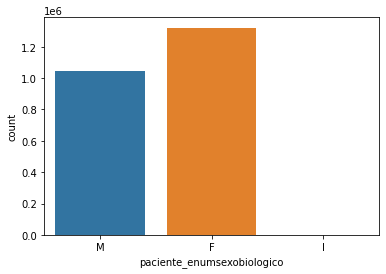

In [12]:
sns.countplot(x = data_vac['paciente_enumsexobiologico']);

Já podemos responder a umas das perguntas levantas **quanto ao gênero (homem/mulher) que foi mais cobertos com a vacinação?** A análise preliminar mostra que mais mulheres foram vacinadas em comparação ao quantitativo de homens.

### Podemos analisar o perfil quanto a raça dos vacinados
O dicionário dos dados fornece:

1 - branca

2 - preta

3 - parda

4- amarela

5 - indigena

99- sem informação

In [13]:
# contando os valores únicos que existem na coluna 'raça'
# Esse grafico de contagem pode tanto ser feito a partir da coluna paciente_racacor_valor 
# quanto paciente_racacor_codigo

np.unique(data_vac['paciente_racacor_codigo'], return_counts=True)

(array([ 1.,  2.,  3.,  4.,  5., 99., nan]),
 array([701542,  95222, 696203, 489281,   1015, 385703,      1]))

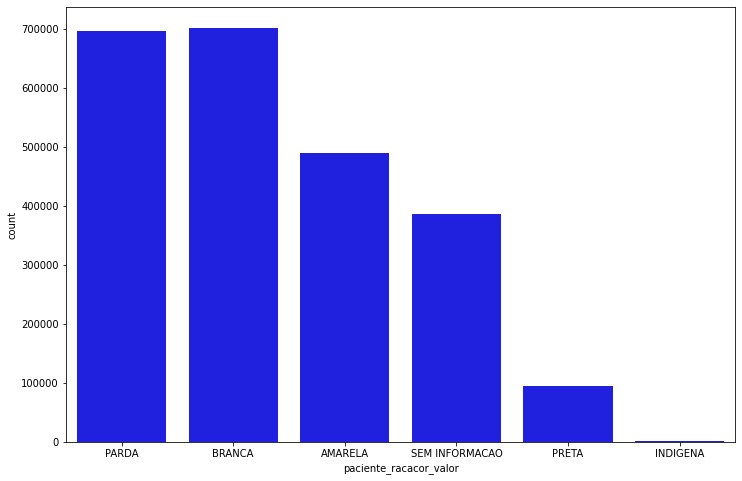

In [14]:
plt.figure(figsize=(12, 8))
sns.countplot(x = data_vac['paciente_racacor_valor'], color='blue');

A contagem mostra que, quanto a raça as pessoas se identificam em:

1 - brancos - 701542 pessoas vacinadas.

2 - preta -  95222 pessoas vacinadas.

3 - parda - 696203 pessoas vacinadas.

4 - amarela -  489281 pessoas vacinadas.

5 - indigena - 1015 vacinados

99 - sem informação - 385703 vacinados

apenas um dado é inconsistente.

E com isso respondemos a mais uma pergunta sobre qual é o **perfil dos vacinados quanto a raça**.

In [15]:
# Checando o total de linhas
701542+ 95222+696203+489281+1015+ 385703+1 == 2368967

True

### Números quanto ao número de doses aplicadas
para responder as perguntas:

Quantas pessoas já estão vacinadas com pelo menos uma dose (D1)? temos que 1706098 tomaram pelo menos uma dose

Quantas pessoas já estão completamente vacinadas (D1+D2) ou dose única? 609797 + 50966 + 2106 = 662869 estão completamente imunizadas com duas doses ou uma doze única

O gráfico abaixo nos mostra que o maior número de pessoas tomou apenas a primeira dose da vacina

In [16]:
# As linhas abaixo são referentes a mesma vacina Vacina covid-19 - Ad26.COV2.S - Janssen-Cilag
print(data_vac[data_vac['vacina_descricao_dose'] == 'Dose\xa0'].shape)
print(data_vac[data_vac['vacina_descricao_dose'] == 'Única\xa0'].shape)

# num dataframe transformado elas poderiam ser mescladas

(2106, 34)
(50966, 34)


In [17]:
# contando os valores únicos que existem na coluna 'vacina_descricao_dose
np.unique(data_vac['vacina_descricao_dose'], return_counts=True)

(array(['1ª\xa0Dose', '2ª\xa0Dose', 'Dose\xa0', 'Única\xa0'], dtype=object),
 array([1706098,  609797,    2106,   50966]))

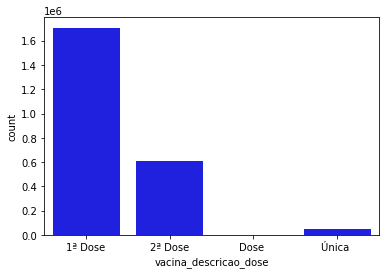

In [18]:
sns.countplot(x = data_vac['vacina_descricao_dose'], color='blue');

### Quanto ao fabricante da vacina - Qual foi a vacina mais aplicada por fabricante?

O dicionário informa os seguintes códigos

85 - Vacina covid-19 covishield - Astra/Zeneca -  1127963 doses

86 - Coronavac - Sinovac/Butantan - 846328 doses

87 - Vacina covid-19 BNT 162b2 - BioNthech/Pfizer - 846328 doses

88 - Vacina covid-19 - Ad26.COV2.S - Janssen-Cilag - 53988 doses

In [19]:
# data_vac[data_vac['vacina_descricao_dose'] == 'Dose\xa0'][:2]
# data_vac[data_vac['vacina_descricao_dose'] == 'Única\xa0'][:2]

In [20]:
#quanto ao fabricante
np.unique(data_vac['vacina_codigo'], return_counts=True)

(array([85, 86, 87, 88]), array([1127963,  846328,  340688,   53988]))

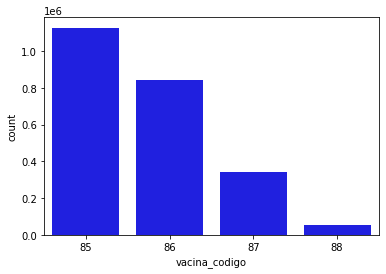

In [21]:
sns.countplot(x = data_vac['vacina_codigo'], color='blue');

In [22]:
#grafico = px.scatter_matrix(data_vac, dimensions=['paciente_idade', 'vacina_descricao_dose', 'paciente_enumsexobiologico'])
#grafico.show()

## Tratando os valores inconsistentes 

In [23]:
#removendo colunas que nao sao de interesse
#primeiro identificamos todas as colunas do nosso dataframe
data_vac.columns

Index(['document_id', 'paciente_id', 'paciente_idade',
       'paciente_datanascimento', 'paciente_enumsexobiologico',
       'paciente_racacor_codigo', 'paciente_racacor_valor',
       'paciente_endereco_coibgemunicipio', 'paciente_endereco_copais',
       'paciente_endereco_nmmunicipio', 'paciente_endereco_nmpais',
       'paciente_endereco_uf', 'paciente_endereco_cep',
       'paciente_nacionalidade_enumnacionalidade', 'estabelecimento_valor',
       'estabelecimento_razaosocial', 'estalecimento_nofantasia',
       'estabelecimento_municipio_codigo', 'estabelecimento_municipio_nome',
       'estabelecimento_uf', 'vacina_grupoatendimento_codigo',
       'vacina_grupoatendimento_nome', 'vacina_categoria_codigo',
       'vacina_categoria_nome', 'vacina_lote', 'vacina_fabricante_nome',
       'vacina_fabricante_referencia', 'vacina_dataaplicacao',
       'vacina_descricao_dose', 'vacina_codigo', 'vacina_nome',
       'sistema_origem', 'data_importacao_rnds', 'id_sistema_origem'],
      

In [24]:
# Apagando colunas que nao sao de interesse com o .drop
# document_id, pacient_id, paciente_datanascimento, paciente (de todos os registros da base de dados)

base_vacina2 = data_vac.drop(['document_id', 'paciente_id', 
       'paciente_datanascimento', 'paciente_racacor_valor',
       'paciente_endereco_coibgemunicipio', 'paciente_endereco_copais',
       'paciente_endereco_uf', 'paciente_endereco_nmpais',
       'paciente_endereco_cep', 'paciente_nacionalidade_enumnacionalidade', 'estabelecimento_valor',
       'estabelecimento_razaosocial', 'estalecimento_nofantasia',
       'estabelecimento_municipio_codigo', 'estabelecimento_municipio_nome',
       'estabelecimento_uf', 'vacina_grupoatendimento_codigo',
       'vacina_grupoatendimento_nome', 'vacina_categoria_codigo',
       'vacina_categoria_nome', 'vacina_lote', 'vacina_fabricante_nome', 'vacina_fabricante_referencia',
       'vacina_dataaplicacao', 'vacina_nome',
       'sistema_origem', 'data_importacao_rnds', 'id_sistema_origem' ], axis=1)

In [25]:
base_vacina2

,paciente_idade,paciente_enumsexobiologico,paciente_racacor_codigo,paciente_endereco_nmmunicipio,vacina_descricao_dose,vacina_codigo
0,54.0,M,3.0,CEARA-MIRIM,1ª Dose,85
1,48.0,F,1.0,PARNAMIRIM,2ª Dose,86
2,40.0,F,3.0,CEARA-MIRIM,1ª Dose,87
3,39.0,F,3.0,MOSSORO,2ª Dose,86
4,45.0,F,4.0,NATAL,1ª Dose,87
...,...,...,...,...,...,...
2368962,24.0,F,1.0,ACU,1ª Dose,85
2368963,60.0,F,1.0,PARNAMIRIM,1ª Dose,85
2368964,63.0,F,3.0,NATAL,1ª Dose,85
2368965,38.0,F,1.0,NATAL,1ª Dose,87


In [26]:
pd.options.display.float_format = '{:.2f}'.format

base_vacina2.describe()

,paciente_idade,paciente_racacor_codigo,vacina_codigo
count,2368966.00,2368966.00,2368967.00
mean,52.57,18.21,85.71
std,17.17,35.65,0.79
min,0.00,1.00,85.00
25%,39.00,1.00,85.00
50%,52.00,3.00,86.00
75%,65.00,4.00,86.00
max,131.00,99.00,88.00


In [27]:
# verificando valores onde se encontram dados nao-nulos 
#Contagem de dados não-nulos de todas as colunas com o .count
base_vacina2.count() == 2368967 

paciente_idade                   False
paciente_enumsexobiologico       False
paciente_racacor_codigo          False
paciente_endereco_nmmunicipio    False
vacina_descricao_dose             True
vacina_codigo                     True
dtype: bool

Note que temos as colunas:
paciente_idade                  
paciente_enumsexobiologico       
paciente_racacor_codigo         
paciente_endereco_nmmunicipio    

com menos dados que o total

In [28]:
# Descobrindo a quantidade de valores inconsistentes ou faltantes 
print(base_vacina2.paciente_idade.count())
print(base_vacina2.paciente_enumsexobiologico.count())
print(base_vacina2.paciente_racacor_codigo.count())
print(base_vacina2.paciente_endereco_nmmunicipio.count())  

2368966
2368966
2368966
2361353


A maior quantidade de dados faltantes está em no município com 7614 entradas não preenchidas!

### 1 - Corrigindo a idade

In [29]:
base_vacina2.loc[base_vacina2['paciente_idade'] == 0 ] 

,paciente_idade,paciente_enumsexobiologico,paciente_racacor_codigo,paciente_endereco_nmmunicipio,vacina_descricao_dose,vacina_codigo
37374,0.00,F,3.00,CEARA-MIRIM,1ª Dose,87
264972,0.00,F,1.00,NATAL,1ª Dose,86
361426,0.00,M,99.00,NaN,1ª Dose,85
1766562,0.00,F,4.00,SAO GONCALO DO AMARANTE,1ª Dose,86
1819892,0.00,M,1.00,NATAL,1ª Dose,87


In [30]:
base_vacina2.loc[pd.isnull(base_vacina2['paciente_idade'])]

,paciente_idade,paciente_enumsexobiologico,paciente_racacor_codigo,paciente_endereco_nmmunicipio,vacina_descricao_dose,vacina_codigo
384,NaN,NaN,NaN,NaN,1ª Dose,85


Temos 6 linhas com idades não válidas sendo 5 com idade 0 e 1 com valor faltante.
Podemos preencher com a média



In [31]:
base_vacina2.loc[base_vacina2['paciente_idade'] == 0, 'paciente_idade' ] = base_vacina2['paciente_idade'].mean()
base_vacina2.loc[pd.isnull(base_vacina2['paciente_idade']),  'paciente_idade'] =  base_vacina2['paciente_idade'].mean()

In [32]:
base_vacina2.loc[base_vacina2['paciente_idade'] == 0 ] 

,paciente_idade,paciente_enumsexobiologico,paciente_racacor_codigo,paciente_endereco_nmmunicipio,vacina_descricao_dose,vacina_codigo


In [33]:
base_vacina2.loc[pd.isnull(base_vacina2['paciente_idade'])]

,paciente_idade,paciente_enumsexobiologico,paciente_racacor_codigo,paciente_endereco_nmmunicipio,vacina_descricao_dose,vacina_codigo


### 2 - Corrigindo o paciente_enumsexobiologico

In [34]:
base_vacina2.loc[base_vacina2['paciente_enumsexobiologico'] == '' ] 

,paciente_idade,paciente_enumsexobiologico,paciente_racacor_codigo,paciente_endereco_nmmunicipio,vacina_descricao_dose,vacina_codigo


In [80]:
base_vacina2.loc[base_vacina2['paciente_enumsexobiologico'] == 'I' ] 

,paciente_idade,paciente_enumsexobiologico,paciente_racacor_codigo,paciente_endereco_nmmunicipio,vacina_descricao_dose,vacina_codigo
240888,51.00,I,2.00,SANTO ANTONIO,1ª Dose,85
613178,72.00,I,1.00,NATAL,1ª Dose,86
1609945,79.00,I,99.00,PARNAMIRIM,1ª Dose,86
1709085,53.00,I,1.00,CANGUARETAMA,1ª Dose,85
1807752,72.00,I,1.00,NATAL,2ª Dose,86
1890988,79.00,I,99.00,PARNAMIRIM,2ª Dose,86


In [35]:
base_vacina2.loc[pd.isnull(base_vacina2['paciente_enumsexobiologico'])]

,paciente_idade,paciente_enumsexobiologico,paciente_racacor_codigo,paciente_endereco_nmmunicipio,vacina_descricao_dose,vacina_codigo
384,52.57,NaN,NaN,NaN,1ª Dose,85


In [89]:
base_vacina3 = base_vacina2.drop(base_vacina2.loc[base_vacina2['paciente_enumsexobiologico'] == 'I' ].index)

In [90]:
base_vacina3.loc[pd.isnull(base_vacina3['paciente_enumsexobiologico'])]

,paciente_idade,paciente_enumsexobiologico,paciente_racacor_codigo,paciente_endereco_nmmunicipio,vacina_descricao_dose,vacina_codigo


### 3 -corrigindo  paciente_racacor_codigo

In [91]:
base_vacina3.loc[base_vacina3['paciente_racacor_codigo'] == 0 ] 

,paciente_idade,paciente_enumsexobiologico,paciente_racacor_codigo,paciente_endereco_nmmunicipio,vacina_descricao_dose,vacina_codigo


In [92]:
base_vacina3.loc[pd.isnull(base_vacina3['paciente_racacor_codigo'])]

,paciente_idade,paciente_enumsexobiologico,paciente_racacor_codigo,paciente_endereco_nmmunicipio,vacina_descricao_dose,vacina_codigo
384,52.57,F,NaN,NaN,1ª Dose,85


Por se tratar de somente uma linha e ser um atributo categórico podemos excluir esse dado ou substituir pelo que aparece mais vezes.

In [93]:
base_vacina3 = base_vacina3.drop(384)

In [94]:
base_vacina3

,paciente_idade,paciente_enumsexobiologico,paciente_racacor_codigo,paciente_endereco_nmmunicipio,vacina_descricao_dose,vacina_codigo
0,54.00,M,3.00,CEARA-MIRIM,1ª Dose,85
1,48.00,F,1.00,PARNAMIRIM,2ª Dose,86
2,40.00,F,3.00,CEARA-MIRIM,1ª Dose,87
3,39.00,F,3.00,MOSSORO,2ª Dose,86
4,45.00,F,4.00,NATAL,1ª Dose,87
...,...,...,...,...,...,...
2368962,24.00,F,1.00,ACU,1ª Dose,85
2368963,60.00,F,1.00,PARNAMIRIM,1ª Dose,85
2368964,63.00,F,3.00,NATAL,1ª Dose,85
2368965,38.00,F,1.00,NATAL,1ª Dose,87


In [96]:
base_vacina3.count() == 2368960

paciente_idade                    True
paciente_enumsexobiologico        True
paciente_racacor_codigo           True
paciente_endereco_nmmunicipio    False
vacina_descricao_dose             True
vacina_codigo                     True
dtype: bool

Note que agora, somente a coluna  endereco_nmmunicipio  contém dados faltantes

### 4 -corrigindo  paciente_endereco_nmmunicipio 

In [97]:
# testando para ver se tem algum resultado nan
base_vacina3.loc[pd.isnull(base_vacina3['paciente_endereco_nmmunicipio'])]

,paciente_idade,paciente_enumsexobiologico,paciente_racacor_codigo,paciente_endereco_nmmunicipio,vacina_descricao_dose,vacina_codigo
468,57.00,F,99.00,NaN,1ª Dose,85
843,75.00,M,99.00,NaN,2ª Dose,86
975,43.00,M,1.00,NaN,2ª Dose,85
1129,77.00,M,4.00,NaN,2ª Dose,86
1138,74.00,F,99.00,NaN,1ª Dose,86
...,...,...,...,...,...,...
2367323,44.00,M,3.00,NaN,1ª Dose,87
2367429,42.00,M,99.00,NaN,1ª Dose,85
2367532,66.00,M,3.00,NaN,1ª Dose,85
2368429,39.00,M,4.00,NaN,1ª Dose,87


In [98]:
df = base_vacina3.drop(base_vacina3.loc[pd.isnull(base_vacina3['paciente_endereco_nmmunicipio'])].index)

In [99]:
df

,paciente_idade,paciente_enumsexobiologico,paciente_racacor_codigo,paciente_endereco_nmmunicipio,vacina_descricao_dose,vacina_codigo
0,54.00,M,3.00,CEARA-MIRIM,1ª Dose,85
1,48.00,F,1.00,PARNAMIRIM,2ª Dose,86
2,40.00,F,3.00,CEARA-MIRIM,1ª Dose,87
3,39.00,F,3.00,MOSSORO,2ª Dose,86
4,45.00,F,4.00,NATAL,1ª Dose,87
...,...,...,...,...,...,...
2368962,24.00,F,1.00,ACU,1ª Dose,85
2368963,60.00,F,1.00,PARNAMIRIM,1ª Dose,85
2368964,63.00,F,3.00,NATAL,1ª Dose,85
2368965,38.00,F,1.00,NATAL,1ª Dose,87


In [100]:
df.count() == 2361347

paciente_idade                   True
paciente_enumsexobiologico       True
paciente_racacor_codigo          True
paciente_endereco_nmmunicipio    True
vacina_descricao_dose            True
vacina_codigo                    True
dtype: bool

In [101]:
df.loc[pd.isnull(base_vacina3['vacina_descricao_dose'])]

,paciente_idade,paciente_enumsexobiologico,paciente_racacor_codigo,paciente_endereco_nmmunicipio,vacina_descricao_dose,vacina_codigo


### 5 -corrigindo  vacina_descricao_dose	
Vamos substituit a descrição 'dose' por 'unica'

In [113]:
# print(data_vac[data_vac['vacina_descricao_dose'] == 'Dose\xa0'].shape)
# print(data_vac[data_vac['vacina_descricao_dose'] == 'Única\xa0'].shape)

df.loc[df['vacina_descricao_dose'] ==  'Dose\xa0', 'vacina_descricao_dose' ] = 'Única\xa0'

In [115]:
df.loc[df['vacina_descricao_dose']==  'Dose\xa0']

,paciente_idade,paciente_enumsexobiologico,paciente_racacor_codigo,paciente_endereco_nmmunicipio,vacina_descricao_dose,vacina_codigo


In [125]:
print(df[df['vacina_descricao_dose'] == 'Dose\xa0'].shape)
print(df[df['vacina_descricao_dose'] == 'Única\xa0'].shape)

(0, 6)
(52880, 6)


In [126]:
df.count() == 2361347

paciente_idade                   True
paciente_enumsexobiologico       True
paciente_racacor_codigo          True
paciente_endereco_nmmunicipio    True
vacina_descricao_dose            True
vacina_codigo                    True
dtype: bool

# Salvand novo Dataframe com os dados tratados

In [127]:
df.to_csv('dados_vacina_RN_clean.csv')

In [128]:
#contando os valores únicos que existem na coluna 'sexo'
np.unique(df['paciente_enumsexobiologico'], return_counts=True)

(array(['F', 'M'], dtype=object), array([1317696, 1043651]))

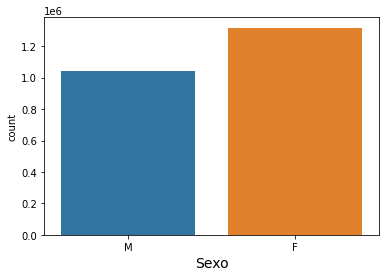

In [129]:
sns.countplot(x = df['paciente_enumsexobiologico']);
plt.xlabel('Sexo', size=14)
plt.show()

In [130]:
#quanto ao fabricante
np.unique(df['vacina_codigo'], return_counts=True)

(array([85, 86, 87, 88]), array([1124414,  843388,  339750,   53795]))

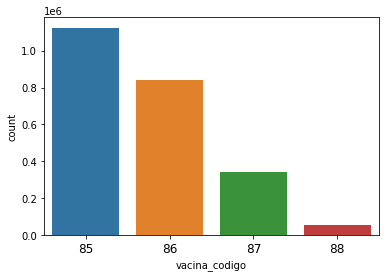

In [131]:
sns.countplot(x = df['vacina_codigo']);
plt.xticks(size=12)
plt.show()

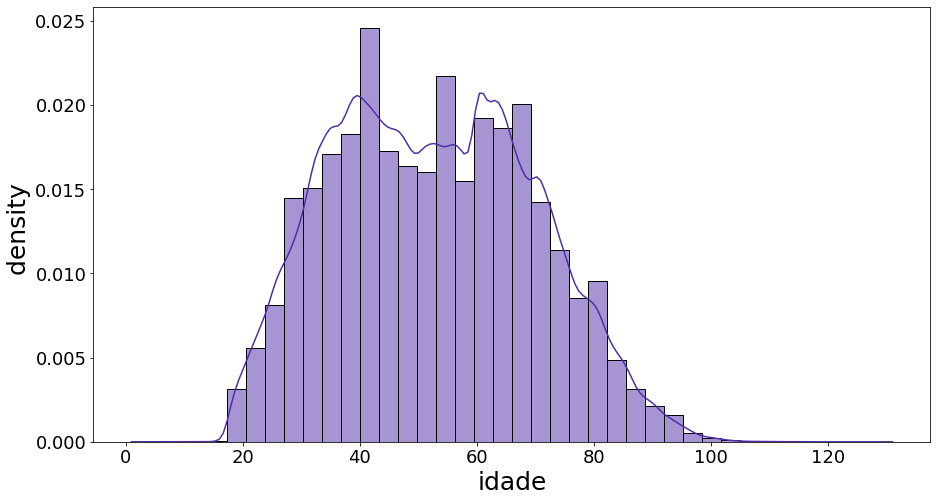

In [132]:
# os numeros por idade
plt.figure(figsize=(15, 8))
sns.histplot(x = df['paciente_idade'], bins=40, kde=True, stat="density", color='#512DA8')
plt.xticks(size =18)
plt.yticks(size = 18)
plt.xlabel('idade', size =25)
plt.ylabel('density ', size =25)

plt.show()

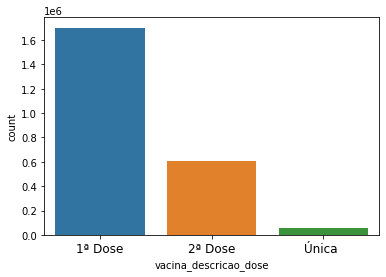

In [134]:
sns.countplot(x = df['vacina_descricao_dose']);
plt.xticks(size=12)
plt.show()